**Sistema caótico**

- Aperiódico
- Sensible, dependencia de las condiciones iniciales
- Está acotado

Exponente de liapunov ... divergencia ?

como una trayectoria se acerca o aleja d ela otra 

d(f)= d[0]e^$\landa t$

- landa = 0 la distancia entre las dos trayectorias no cambia en el tiempo

- landa > 0, aumenta

- landa = 0 , disminuye y se acerca

para despejar el landa se debe dejar pasar un **buen** tiempo hasta que sea estable


In [1]:
from sympy import *
import numpy as np
from scipy import integrate

In [26]:
%matplotlib inline

In [2]:
init_printing(pretty_print=True)

<h1>Atractor de Rössler</h1>

 \begin{matrix} \frac{dx}{dt} = -y - z \\ \frac{dy}{dt} = x + Ay \\ \frac{dz}{dt} = B + z(x-C) \end{matrix}  

In [3]:
x,y,z = symbols("x,y,z",cls = Function)
a,b,c,t = symbols("a,b,c,t")

In [4]:
dxdt = -y(t) -z(t)
dydt = x(t) + a*y(t)
dzdt = b + z(t)*(x(t)-c)

In [5]:
diffx = Eq(x(t).diff(t) , dxdt)
diffy = Eq(y(t).diff(t) , dydt)
diffz = Eq(z(t).diff(t) , dzdt)

In [6]:
diffx

Derivative(x(t), t) == -y(t) - z(t)

In [7]:
diffy = diffy.subs([(a,.15)])
diffz = diffz.subs([(b,.2),(c,10)])

print (pretty(diffy))
print (pretty(diffz))

d                          
──(y(t)) = x(t) + 0.15⋅y(t)
dt                         
d                                
──(z(t)) = (x(t) - 10)⋅z(t) + 0.2
dt                               


In [8]:
eq = (Eq(diff(x(t),t), dxdt), Eq(diff(y(t),t), dydt),Eq(diff(z(t),t), dzdt))


In [9]:
sol_gral = dsolve(eq,) #Analiticamnte nope

NotImplementedError: 

<h1>Solución numérica</h1> 

In [13]:
def rossler(X,t,a,b,c):
    """Integrar sistema de Rossler """
    x,y,z = X
    return (-y -z,x + a*y,b + z*(x-c))

In [59]:
X = [.2,.3,.1] # condiciones iniciales 
tmax = 50 
t = np.arange(0, tmax + 1,0.01)

In [60]:
a , b, c = .15,.2,10
F = integrate.odeint(rossler, X, t, args = (a,b,c))

In [61]:
x, y, z = F[:,0], F[:,1], F[:,2]

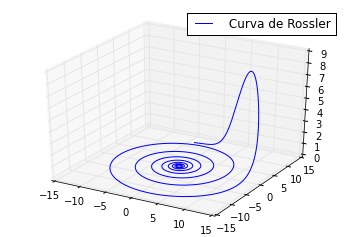

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label=' Curva de Rossler')
ax.legend()
plt.show() #http://mathworld.wolfram.com/RoesslerAttractor.html

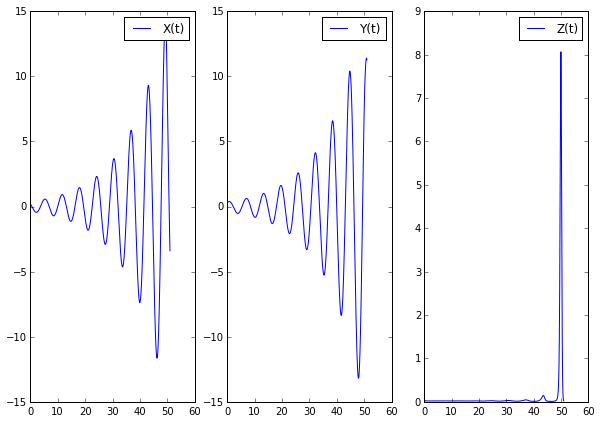

In [72]:
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.plot(t,x, label = "X(t)")
plt.legend()
plt.subplot(1,3,2)
plt.plot(t,y, label = "Y(t)")
plt.legend()
plt.subplot(1,3,3)
plt.plot(t,z, label = "Z(t)")
plt.legend()


<h1>Atractor de Lorenz</h1>

$$\frac{dx}{dt}  = a (y - x)$$
$$\frac{dy}{dt} = x (b - z) - y$$
$$\frac{dz}{dt}  = xy - c z$$

a = 16.0

b = 45.92

c = 4.0

In [73]:
def lorenz(X,t,a,b,c):
    """Integrar sistema de Lorenz """
    x,y,z = X
    return (a*(y-x),x*(b-z)-y,x*y-c*z)

In [81]:
X = [.2,.3,.1] # condiciones iniciales 
#tmax = 50 
tmax = 10
t = np.arange(0, tmax + 1,0.01)

In [82]:
a , b, c = 16,45.92,4
F = integrate.odeint(lorenz, X, t, args = (a,b,c))

In [83]:
x, y, z = F[:,0], F[:,1], F[:,2]

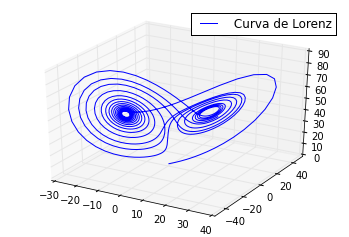

In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label=' Curva de Lorenz')
ax.legend()
plt.show() 

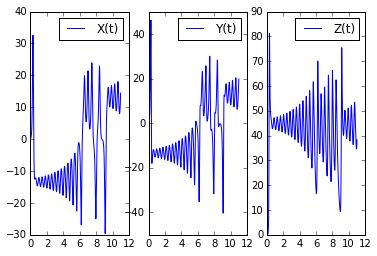

In [85]:
plt.figure()
plt.subplot(1,3,1)
plt.plot(t,x, label = "X(t)")
plt.legend()
plt.subplot(1,3,2)
plt.plot(t,y, label = "Y(t)")
plt.legend()
plt.subplot(1,3,3)
plt.plot(t,z, label = "Z(t)")
plt.legend()
